## KMeans Clustering Using Mall_Customers Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir('E:\\Professionals\\Naresh IT data\\important\\Datasets')

In [3]:
df=pd.read_csv('Mall_Customers.csv')

In [4]:
df.head(2)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [5]:
df.shape

(200, 5)

In [6]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
X=df.iloc[:,[3,4]]
X.head(3)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6


In [8]:
from sklearn.cluster import KMeans

### Elbow Method

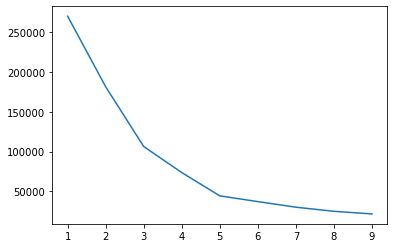

In [9]:
sse=[]
k_rng=range(1,10)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)
plt.plot(k_rng,sse) 

#### Fitting KMeans to the Dataset

In [10]:
km=KMeans(n_clusters=5)
km.fit(X)
y_pred=km.predict(X)
y_pred

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [11]:
df['cluster']=y_pred

In [12]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [13]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]
df5=df[df.cluster==4]

In [14]:
centroid=km.cluster_centers_
centroid

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

### Visualization

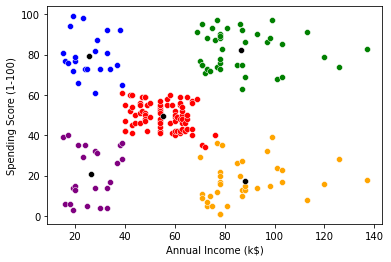

In [15]:
sns.scatterplot(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='Red')
sns.scatterplot(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='Green')
sns.scatterplot(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='Blue')
sns.scatterplot(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color='Orange')
sns.scatterplot(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],color='Purple')
sns.scatterplot(centroid[:,0],centroid[:,1],color='Black')
plt.show()

## KMeans Clustering Using University Dataset

In [16]:
df=pd.read_csv('Universities.csv')
df.head(2)

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81


In [17]:
X=df.iloc[:,[1,5]]
X.head(2)

,SAT,Expenses
0,1310,22704
1,1415,63575


#### Elbow

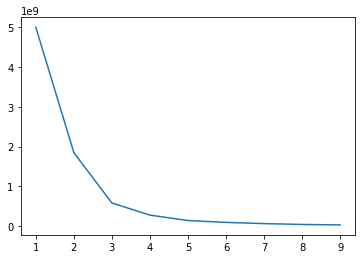

In [18]:
sse=[]
k_rng=range(1,10)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)
plt.plot(k_rng,sse)    
plt.show()

In [19]:
km=KMeans(n_clusters=4)
km.fit(X)
y_pred=km.predict(X)
y_pred

array([3, 2, 3, 0, 3, 0, 0, 3, 0, 2, 0, 3, 1, 1, 0, 1, 0, 1, 1, 0, 1, 3,
       1, 1, 0])

In [20]:
df['cluster']=y_pred
df.head(3)

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster
0,Brown,1310,89,22,13,22704,94,3
1,CalTech,1415,100,25,6,63575,81,2
2,CMU,1260,62,59,9,25026,72,3


In [21]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]

In [22]:
centroid=km.cluster_centers_
centroid

array([[ 1349.44444444, 35357.33333333],
       [ 1143.25      , 12361.625     ],
       [ 1360.        , 61133.        ],
       [ 1275.        , 24220.83333333]])

<AxesSubplot:xlabel='SAT', ylabel='Expenses'>

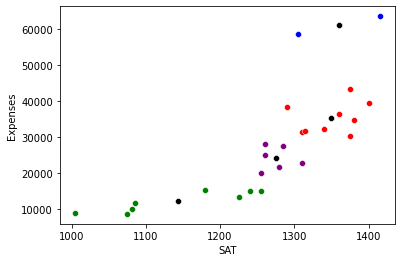

In [23]:
sns.scatterplot(df1['SAT'],df1['Expenses'],color='Red')
sns.scatterplot(df2['SAT'],df2['Expenses'],color='Green')
sns.scatterplot(df3['SAT'],df3['Expenses'],color='Blue')
sns.scatterplot(df4['SAT'],df4['Expenses'],color='Purple')
sns.scatterplot(centroid[:,0],centroid[:,1],color='Black')

## KMeans Clustering Using Income Dataset

In [24]:
os.chdir('E:\\prasad\\practice\\dataset')

In [25]:
df=pd.read_csv('income.csv')

In [26]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [27]:
df.isnull().sum()

Name         0
Age          0
Income($)    0
dtype: int64

In [28]:
df.shape

(22, 3)

In [29]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


<AxesSubplot:xlabel='Age', ylabel='Income($)'>

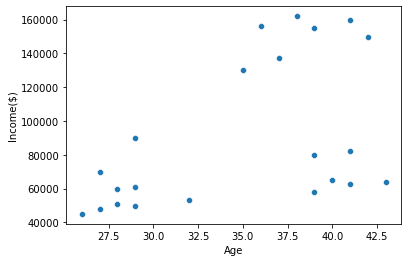

In [30]:
sns.scatterplot('Age','Income($)',data=df)

#### Feature Scalling

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
sc=StandardScaler()

In [33]:
df['Age']=sc.fit_transform(df[['Age']])
df['Income($)']=sc.fit_transform(df[['Income($)']])

In [34]:
df.head()

,Name,Age,Income($)
0,Rob,-1.356055,-0.480684
1,Michael,-1.009157,-0.010159
2,Mohan,-1.009157,-0.692421
3,Ismail,-1.182606,-0.715947
4,Kory,1.245679,1.401417


In [35]:
X=df.iloc[:,[1,2]]
X.head()

,Age,Income($)
0,-1.356055,-0.480684
1,-1.009157,-0.010159
2,-1.009157,-0.692421
3,-1.182606,-0.715947
4,1.245679,1.401417


#### Create Elbow Graph

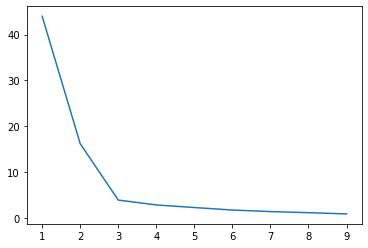

In [36]:
sse=[]
k_rng=range(1,10)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)
plt.plot(k_rng,sse)    

#### Use KMeans Algorithm

In [37]:
km=KMeans(n_clusters=3)
km.fit(X)
y_pred=km.predict(X)
y_pred

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [38]:
df['cluster']=y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,-1.356055,-0.480684,1
1,Michael,-1.009157,-0.010159,1
2,Mohan,-1.009157,-0.692421,1
3,Ismail,-1.182606,-0.715947,1
4,Kory,1.245679,1.401417,2


In [39]:
centroid=km.cluster_centers_
centroid

array([[ 0.98550535, -0.51205261],
       [-1.1247901 , -0.74862223],
       [ 0.60143983,  1.40141653]])

In [40]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

<AxesSubplot:xlabel='Age', ylabel='Income($)'>

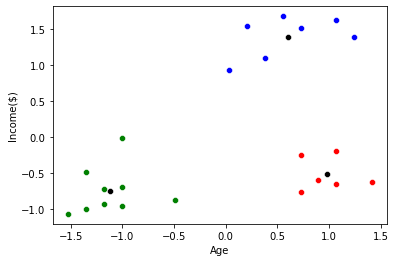

In [41]:
sns.scatterplot(df1['Age'],df1['Income($)'],color='Red')
sns.scatterplot(df2['Age'],df2['Income($)'],color='Green')
sns.scatterplot(df3['Age'],df3['Income($)'],color='Blue')
sns.scatterplot(centroid[:,0],centroid[:,1],color='Black')

## KMeans Clustering Using Iris Dataset

In [42]:
from sklearn.datasets import load_iris

In [43]:
iris=load_iris()

In [44]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [45]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [46]:
df['target']=iris.target

In [47]:
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


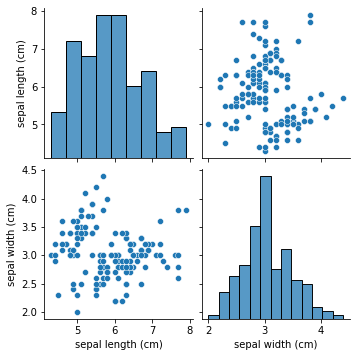

In [48]:
sns.pairplot(df[['sepal length (cm)','sepal width (cm)']])

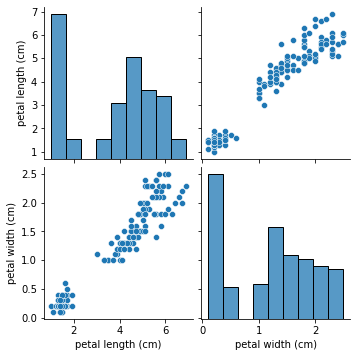

In [49]:
sns.pairplot(df[['petal length (cm)','petal width (cm)']])

In [50]:
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [51]:
X=df.iloc[:,[0,1]]
X.head(2)

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0


In [52]:
y=df.iloc[:,[2,3]]
y.head(2)

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2


#### Apply KMeans Clustering on sepal length (cm) & sepal width (cm)

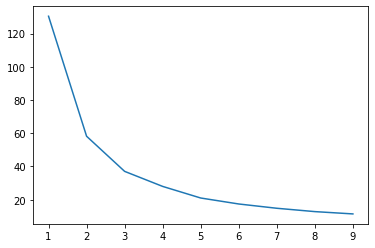

In [53]:
sse=[]
k_rng=range(1,10)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)
plt.plot(k_rng,sse)    
plt.show()

In [54]:
# Use 5 Clusters
km=KMeans(n_clusters=5)
km.fit(X)
y_pred=km.predict(X)
y_pred

array([1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1,
       1, 2, 1, 2, 1, 2, 3, 0, 0, 4, 0, 4, 0, 2, 0, 2, 2, 4, 4, 4, 4, 0,
       4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4,
       4, 4, 4, 4, 4, 2, 4, 4, 4, 0, 2, 4, 0, 4, 3, 0, 0, 3, 2, 3, 0, 3,
       0, 0, 0, 4, 4, 0, 0, 3, 3, 4, 0, 4, 3, 0, 0, 3, 4, 4, 0, 3, 3, 3,
       0, 0, 4, 3, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 4])

In [55]:
df['sepal_cluster']=y_pred
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,sepal_cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,2
2,4.7,3.2,1.3,0.2,0,2
3,4.6,3.1,1.5,0.2,0,2
4,5.0,3.6,1.4,0.2,0,1


In [56]:
df1=df[df.sepal_cluster==0]
df2=df[df.sepal_cluster==1]
df3=df[df.sepal_cluster==2]
df4=df[df.sepal_cluster==3]
df5=df[df.sepal_cluster==4]

In [57]:
centroid=km.cluster_centers_
centroid

array([[6.53421053, 3.04210526],
       [5.22068966, 3.66551724],
       [4.77777778, 2.94444444],
       [7.43846154, 3.13076923],
       [5.83953488, 2.70930233]])

#### Visualization

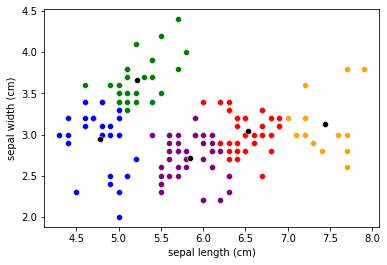

In [58]:
sns.scatterplot(df1['sepal length (cm)'],df1['sepal width (cm)'],color='Red')
sns.scatterplot(df2['sepal length (cm)'],df2['sepal width (cm)'],color='Green')
sns.scatterplot(df3['sepal length (cm)'],df3['sepal width (cm)'],color='Blue')
sns.scatterplot(df4['sepal length (cm)'],df4['sepal width (cm)'],color='Orange')
sns.scatterplot(df5['sepal length (cm)'],df5['sepal width (cm)'],color='Purple')
sns.scatterplot(centroid[:,0],centroid[:,1],color='Black')
plt.show()

#### Apply KMeans Clustering on petal length (cm) & petal width (cm)

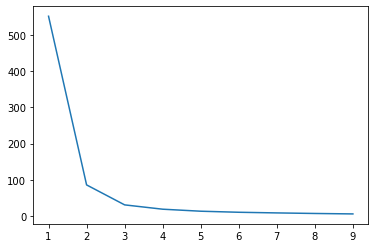

In [59]:
sse=[]
k_rng=range(1,10)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(y)
    sse.append(km.inertia_)
plt.plot(k_rng,sse)    
plt.show()

In [60]:
# Use 3 Clusters
km=KMeans(n_clusters=3)
km.fit(y)
y_pred=km.predict(y)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [61]:
df['petal_cluster']=y_pred
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,sepal_cluster,petal_cluster
0,5.1,3.5,1.4,0.2,0,1,1
1,4.9,3.0,1.4,0.2,0,2,1
2,4.7,3.2,1.3,0.2,0,2,1
3,4.6,3.1,1.5,0.2,0,2,1
4,5.0,3.6,1.4,0.2,0,1,1


In [62]:
df1=df[df.petal_cluster==0]
df2=df[df.petal_cluster==1]
df3=df[df.petal_cluster==2]

In [63]:
centroid=km.cluster_centers_
centroid

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

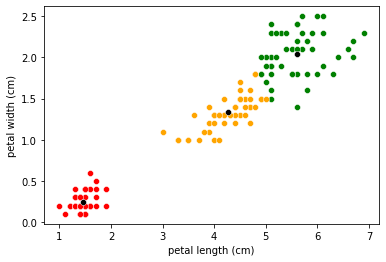

In [64]:
sns.scatterplot(df1['petal length (cm)'],df1['petal width (cm)'],color='Green')
sns.scatterplot(df2['petal length (cm)'],df2['petal width (cm)'],color='Red')
sns.scatterplot(df3['petal length (cm)'],df3['petal width (cm)'],color='Orange')
sns.scatterplot(centroid[:,0],centroid[:,1],color='Black')
plt.show()